<a href="https://colab.research.google.com/github/RishikaKumari23/google-stock-lstm/blob/main/Google_Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Stock Price Prediction using LSTM

This notebook demonstrates how to use an LSTM neural network to predict Google (GOOG) stock prices using historical data.

**Author**: Rishika Kumari

Dataset Source: [Yahoo Finance](https://finance.yahoo.com/)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0078
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 6.4419e-04
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 5.6404e-04
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 4.9504e-04
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 5.4253e-04
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 4.4726e-04
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 4.3987e-04
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 4.2176e-04
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 3.6946e-04
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 3.7278e-04
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 3.7465e-04
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - loss: 4.7841e-04
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 4.0282e-04
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 3.3034e-04
Epoch 15/20

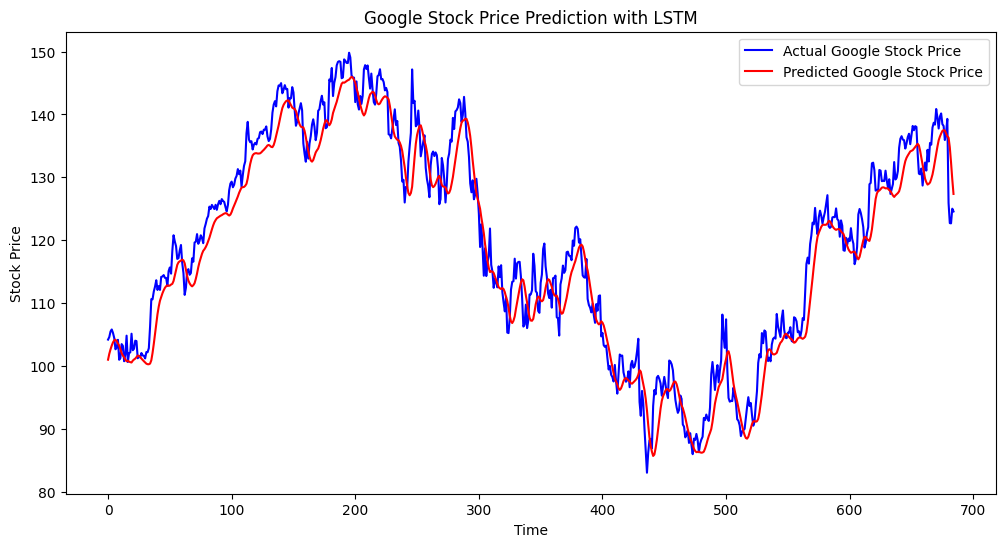

In [1]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
df=yf.download('GOOG',start='2010-01-01',end='2023-11-01')
df=df[['Close']]
df.head()
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
sequence_length=60
X,y=[],[]
for i in range(sequence_length,len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])
X,y=np.array(X),np.array(y)
split=int(0.8*len(X))
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=20,batch_size=32)
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
real=scaler.inverse_transform(y_test.reshape(-1,1))
plt.figure(figsize=(12,6))
plt.plot(real, color='blue',label='Actual Google Stock Price')
plt.plot(predictions,color='red',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()